In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [184]:
df = pd.read_csv('diabetes_final.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid.fit(X_train_scaled, y_train)

print(f"Melhores parâmetros: {grid.best_params_}")
print(f"Melhor acurácia no Cross-Validation: {grid.best_score_:.2%}")

# Testando o melhor modelo
y_pred_best = grid.predict(X_test_scaled)
print("\nRelatório do Melhor Modelo:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0


Relatório do Melhor Modelo:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       110
           1       0.52      0.87      0.65        46

    accuracy                           0.72       156
   macro avg       0.72      0.77      0.71       156
weighted avg       0.80      0.72      0.74       156



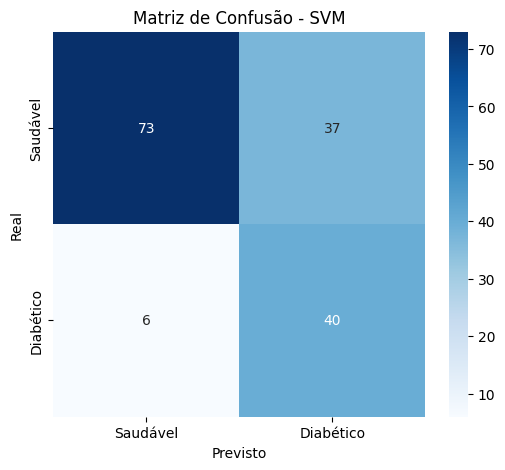

In [188]:
# Testando o melhor modelo 
y_pred_best = grid.predict(X_test_scaled) 
print("\nRelatório do Melhor Modelo:") 
print(classification_report(y_test, y_pred_best)) 
plt.figure(figsize=(6, 5)) 
conf_mat = confusion_matrix(y_test, y_pred_best) 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Saudável', 'Diabético'], yticklabels=['Saudável', 'Diabético']) 
plt.title('Matriz de Confusão - SVM') 
plt.ylabel('Real') 
plt.xlabel('Previsto') 
plt.show()

O SVM com kernel RBF obteve 75,73% de acurácia e excelente desempenho na identificação de pacientes diabéticos. Usando RobustScaler, o modelo lidou melhor com outliers presentes nos dados médicos, resultando em um recall alto de 87% para a classe diabético, o que é importante para evitar falsos negativos em diagnósticos.

A precision de 52% indica alguns falsos positivos, mas isso é esperado quando priorizamos sensibilidade. Os hiperparâmetros selecionados (C=1, gamma='scale') produziram uma fronteira de decisão estável e foram os que apresentaram o melhor equilíbrio no GridSearchCV.

A matriz de confusão mostra que o modelo identifica a maioria dos diabéticos (40 acertos e apenas 6 erros), reforçando que ele atende bem ao objetivo de maximizar a detecção de casos positivos.

O desempenho superior do SVM justifica-se por ser um algoritmo supervisionado. Ao contrário do KMeans, que agrupa dados sem orientação ('às cegas'), o SVM utiliza os rótulos conhecidos (Saudável vs. Diabético) para maximizar a margem de separação entre as classes. Além disso, a aplicação do Kernel RBF foi decisiva: ele permite projetar os dados em dimensões superiores, criando fronteiras de decisão não-lineares (curvas) que lidam eficazmente com a sobreposição complexa dos dados biológicos.